In [60]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# The path to our CSV file
#(name the file we are going to read as "file_gdp")
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas 
#rename it as a dataframe(df) for ease of readibiity
su_vs_gdp_o_df = pd.read_csv(file_gdp)

# Display all columns 
#su_vs_gdp_o_df.columns

# Display information of the df
#su_vs_gdp_o_df.info()

In [104]:
# Group using 'country-year' column and using the aggregate command to define/combine data to respective column.
# for ease of readibility(also we are ommitting columns we do not need)
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita ($)':'first'}).reset_index()


##  Info for countries with highest GDP for 2015"

In [94]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(8)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_8 = gdp_2015_df.head(8)[['country','suicides/100k pop']]
gdp_2015_df_top_8


,country,suicides/100k pop
2270,United States,175.41
1145,Japan,206.04
835,Germany,150.34
2239,United Kingdom,86.74
1097,Italy,78.45
378,Brazil,77.45
1718,Republic of Korea,389.14
1773,Russian Federation,236.92


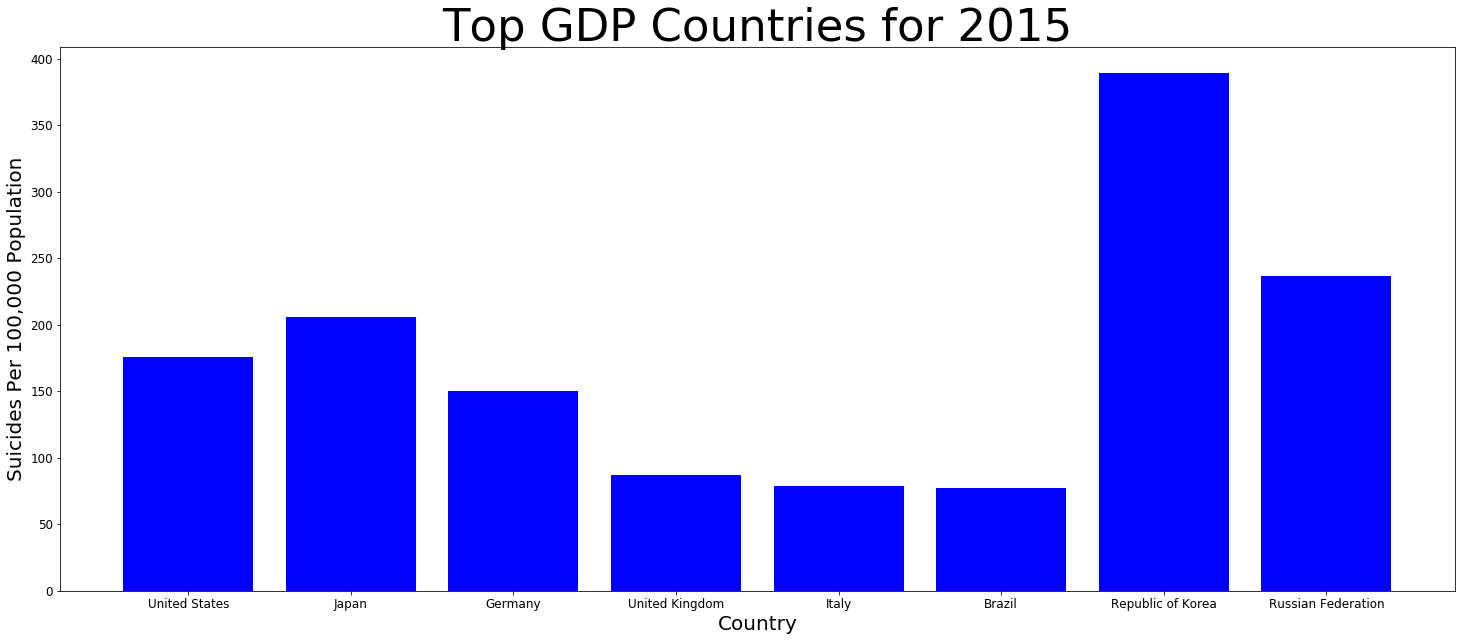

In [97]:
# Create an array that contains the number of users each language has
country1= gdp_2015_df_top_8['country']
suicides1=gdp_2015_df_top_8['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(25,10))
plt.bar(country1, suicides1, color="blue", align="center")

# # Give the chart a title, x label, and y label
plt.title("Top GDP Countries for 2015",fontsize=45)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Suicides Per 100,000 Population",fontsize=20)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp_2015.png')

##  Info for countries with highest GDP for 2005"

In [98]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2005_df = sort_gdp_df.query("year == '2005'")
gdp_2005_df.head(8)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2005_df_top_8 = gdp_2005_df.head(8)[['country','suicides/100k pop']]
gdp_2005_df_top_8


,country,suicides/100k pop
2260,United States,146.68
1135,Japan,266.89
825,Germany,161.49
2229,United Kingdom,79.16
778,France,232.09
1087,Italy,82.59
430,Canada,133.84
1983,Spain,107.66


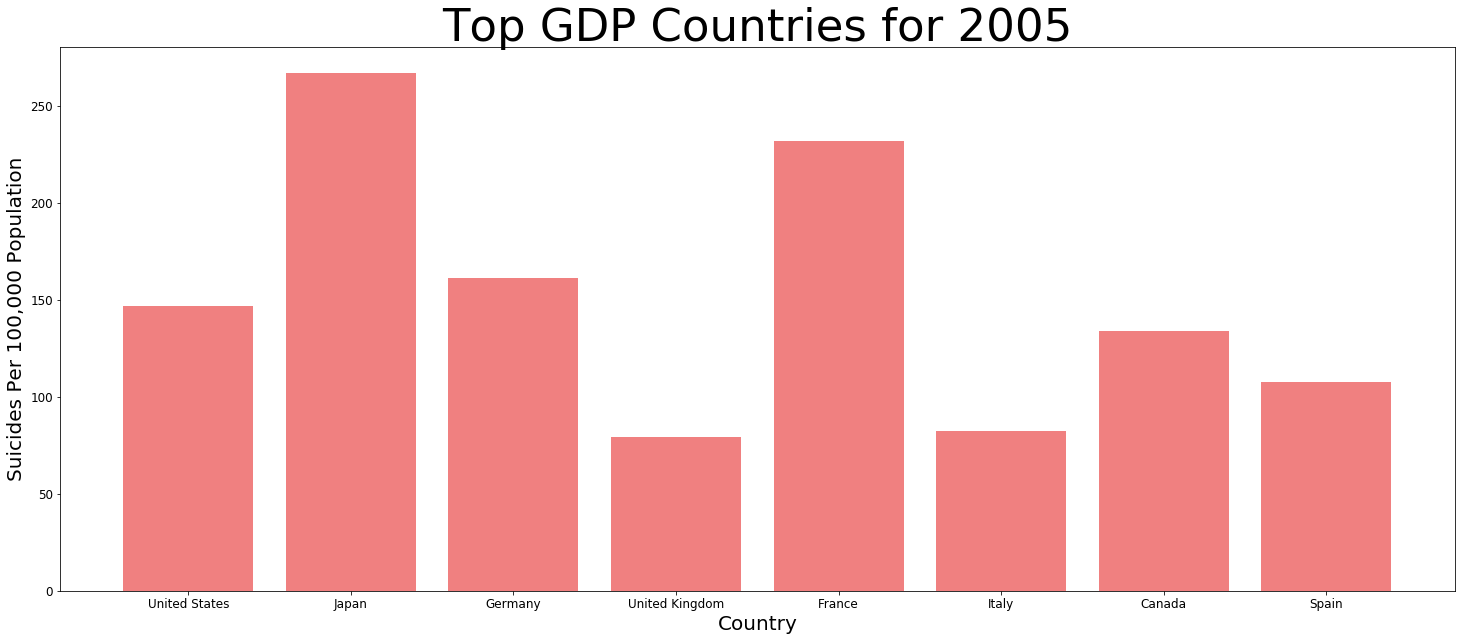

In [107]:
# Create an array that contains the number of users each language has
country2= gdp_2005_df_top_8['country']
suicides2=gdp_2005_df_top_8['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(25,10))
plt.bar(country2, suicides2, color="lightcoral", align="center")

# # Give the chart a title, x label, and y label

plt.title("Top GDP Countries for 2005",fontsize=45)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Suicides Per 100,000 Population",fontsize=20)
plt.rcParams['font.size'] = 12.0

plt.savefig('top_gdp_2005.png')


## GDP 2015 vs 2005

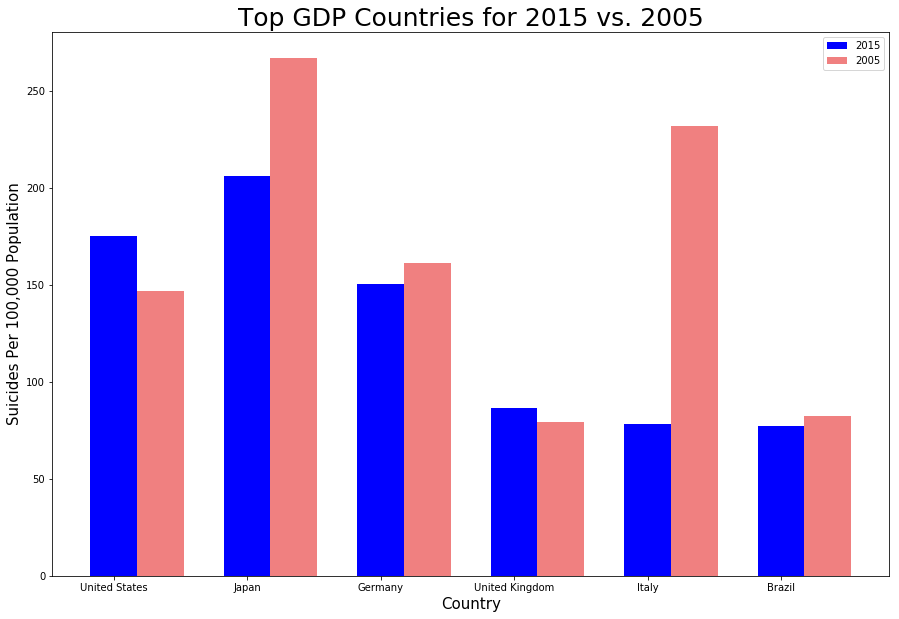

In [65]:
# Create List
N = 6
suicides_2015 = (suicides2015)
suicides_2005 = (suicides2005)



plt.figure(figsize=(15,10))
# # # Give the chart a title,suicides2005 x label, and y label
plt.title("Top GDP Countries for 2015 vs. 2005",fontsize=25)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Suicides Per 100,000 Population",fontsize=15)
# plt.rcParams['font.size'] = 12.0
plt.xticks(range(6),['United States', 'Japan', 'Germany', 'United Kingdom', 'Italy', 'Brazil'])  

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, suicides_2015, width, color='blue', label='2015')
plt.bar(ind + width, suicides_2005, width, color='lightcoral',
    label='2005')


plt.legend(loc='best')
plt.show()